In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_models = pd.read_csv("imputed_data_log.csv")

In [ ]:
df_models.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,5.134821e+03,7.444751,0.266767,1.018222,0.240678,0.744642
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.289894e+04,4.770808,4.173056,1.133213,4.158773,1.103631
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,1.711122e+03,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,4.184856e+03,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.022994e+03,10.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,57.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [9]:
X = df_models.drop(columns="SeriousDlqin2yrs")
y = df_models["SeriousDlqin2yrs"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Default classifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2,
                                       max_features="sqrt", class_weight=None) # Default parameters

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predictions
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8805457308484291, 0.8721532539886017, 0.8765417070323425, 0.8719340189671386, 0.8816049952369612]
Mean AUC score: 0.8765559412146946
Standard Deviation AUC score: 0.00405357596515532
Mean precision score: 0.7069166802811215
Mean recall score: 0.3042553191489362
Mean f1 score: 0.4252728550946817


In [ ]:
# Hyperparameters and resampling: here we study the performance of our classifier for different
# choices of hyperparameters and resampling techniques

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

# Define resampler
# resampler = RandomUnderSampler(sampling_strategy=1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Resample training bacth
    # X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
    y_pred = rf_classifier.predict(X_test)

    # AUC score for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8909701771968723, 0.9000020077279156, 0.8882430240005188, 0.9005803378708408, 0.8981762850070686]
Mean AUC score: 0.8955943663606432
Standard Deviation AUC score: 0.005027501927157215
Mean precision score: 0.7610727542374118
Mean recall score: 0.2757978723404255
Mean f1 score: 0.40474114550579154


In [ ]:
# Features importance: here we study the importance of each feature for our classifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

auc_scores = []
mean_features_importance = []


cv = StratifiedKFold(n_splits=5, shuffle=True)
for train_idx, test_idx in cv.split(X, y):
    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # Save feature importance
    mean_features_importance.append(rf_classifier.feature_importances_)


# Print Features importance
print("Mean Features Importance:")
for i in range(len(X.columns)):
  print(f"{X.columns[i]}: {np.mean(np.array(mean_features_importance),axis=0)[i]}")

Mean Features Importance:
RevolvingUtilizationOfUnsecuredLines: 0.21049804658496635
age: 0.035555599161607596
NumberOfTime30-59DaysPastDueNotWorse: 0.11636209651772027
DebtRatio: 0.1406834101568093
MonthlyIncome: 0.14793077753678038
NumberNonRealEstateLoansOrLines: 0.020634902063272474
NumberOfTimes90DaysLate: 0.21153016780296618
NumberRealEstateLoansOrLines: 0.015318415841067029
NumberOfTime60-89DaysPastDueNotWorse: 0.09295685536895178
NumberOfDependents: 0.008529728965858555


In [ ]:
# Analysis of base trees: here we study the characteristics of the trees (base learners) of our random forests

rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
auc_scores = []
base_learners = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predicted probabilities
    rf_classifier.fit(X_train, y_train)
    y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

    # Save base learners information
    base_learners += list(rf_classifier.estimators_)


# Characteristics of base learners
depth_trees = np.array([tree.tree_.max_depth for tree in base_learners])
num_leaves_trees = np.array([tree.tree_.n_leaves for tree in base_learners])
num_nodes_trees = np.array([tree.tree_.node_count for tree in base_learners])

print(f"Average depth: ",np.mean(depth_trees))
print(f"Average number of leaves: ",np.mean(num_leaves_trees))
print(f"Average number of nodes: ",np.mean(num_nodes_trees))

Average depth:  10.0
Average number of leaves:  334.062
Average number of nodes:  667.124


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Default classifier

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=100, eta=0.3, max_depth=6, min_child_weight=1,
                               colsample_bynode=1, reg_lambda=1) # Default parameters

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train the model and get predictions
    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_test)
    y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.8854429402459637, 0.8991008735706497, 0.8949159167348998, 0.8987872215021707, 0.9019099342295278]
Mean AUC score: 0.8960313772566423
Standard Deviation AUC score: 0.005743399127963377
Mean precision score: 0.7247656865149039
Mean recall score: 0.3085106382978723
Mean f1 score: 0.4327533495157049


In [ ]:
# Hyperparameters and resampling: here we study the performance of our classifier for different
# choices of hyperparameters and resampling techniques

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

#resampler = RandomOverSampler(sampling_strategy=1)

cv = StratifiedKFold(n_splits=5, shuffle=True)
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_idx, test_idx in cv.split(X, y):

    # Training and test batches for the current fold
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Resample training bacth
    #X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Train the model and get predictions
    xgb_classifier.fit(X_train, y_train)
    y_pred = xgb_classifier.predict(X_test)
    y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

    # AUC, precision, recall and f1 scores for the current fold
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Print Results
print("Cross-validation AUC scores:", auc_scores)
print("Mean AUC score:", np.mean(auc_scores))
print("Standard Deviation AUC score:", np.std(auc_scores))
print("Mean precision score:", np.mean(precision_scores))
print("Mean recall score:", np.mean(recall_scores))
print("Mean f1 score:", np.mean(f1_scores))

Cross-validation AUC scores: [0.9028400926417595, 0.8904672635213192, 0.8981164218716432, 0.8993938466749493, 0.9007993132863448]
Mean AUC score: 0.8983233875992032
Standard Deviation AUC score: 0.004229379042413687
Mean precision score: 0.7357049991940178
Mean recall score: 0.30744680851063827
Mean f1 score: 0.43363381191027556


In [ ]:
# Features importance: here we study the importance of each feature for our classifier

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

auc_scores = []
mean_features_importance = []

for i in range(5):
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  for train_idx, test_idx in cv.split(X, y):
      features_importance_batch = []

      # Training and test batches for the current fold
      X_train, y_train = X.loc[train_idx], y[train_idx]
      X_test, y_test = X.loc[test_idx], y[test_idx]

      # Train the model and get predicted probabilities
      xgb_classifier.fit(X_train, y_train)
      y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

      # Save feature importance for each batch
      features_importance_batch.append(xgb_classifier.feature_importances_)

  # Save mean features importance for each cross validation
  mean_features_importance.append(np.mean(np.array(features_importance_batch),axis=0))

# Features importance
print("Mean Features Importance:")
for i in range(len(X.columns)):
  print(f"{X.columns[i]}: {np.mean(np.array(mean_features_importance),axis=0)[i]}")

Mean Features Importance:
RevolvingUtilizationOfUnsecuredLines: 0.14865413308143616
age: 0.01576547883450985
NumberOfTime30-59DaysPastDueNotWorse: 0.14117664098739624
DebtRatio: 0.06923983246088028
MonthlyIncome: 0.04602456092834473
NumberNonRealEstateLoansOrLines: 0.012795048765838146
NumberOfTimes90DaysLate: 0.34083420038223267
NumberRealEstateLoansOrLines: 0.025715297088027
NumberOfTime60-89DaysPastDueNotWorse: 0.18903113901615143
NumberOfDependents: 0.010763721540570259


In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Define objective function
def objective(trial):

    # Define hyperparameters grid
    params = {
        'max_features': trial.suggest_loguniform('max_features', 0.2,0.9),
        'n_estimators': trial.suggest_int("n_estimators",100,400),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 1, 50),
        'random_state': 42
    }

    # Train classifier
    model = RandomForestClassifier(**params)
    kfold = KFold(n_splits=5, shuffle=True, random_state=23)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

    # Compute AUC
    auc = np.mean(cv_scores)

    return auc

# Run the hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-05-08 11:47:59,703] A new study created in memory with name: no-name-60ed2287-5e1d-46bb-9346-86d7b9bf4389
<ipython-input-14-5060921d2689>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'max_features': trial.suggest_loguniform('max_features', 0.2,0.9),
[W 2024-05-08 11:48:43,104] Trial 0 failed with parameters: {'max_features': 0.5197178180516344, 'n_estimators': 156, 'max_depth': 20, 'min_samples_split': 25} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-14-5060921d2689>", line 16, in objective
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
  File "/usr/local/lib/python3.10/dist-packages/sklearn/m

KeyboardInterrupt: 

In [ ]:
# Define objective function
def objective(trial):

    # Define hyperparameters grid
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        "booster": "gbtree",
        'lambda': trial.suggest_uniform('lambda', 0.01,1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4,0.8),
        'eta': trial.suggest_loguniform('eta', 0.01,0.4),
        'n_estimators': trial.suggest_int("n_estimators",100,400),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 15),
        'random_state': 42
    }

    # Train classifier
    model = XGBClassifier(**params)
    kfold = KFold(n_splits=5, shuffle=True, random_state=23)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

    # Compute AUC
    auc = np.mean(cv_scores)

    return auc

# Run the hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)


[I 2024-05-06 14:04:22,981] A new study created in memory with name: no-name-7143cb5c-8da0-44f5-8a7a-53100dd375f3
<ipython-input-41-108d3fe33ba6>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'lambda': trial.suggest_uniform('lambda', 0.01,1),
<ipython-input-41-108d3fe33ba6>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4,0.8),
<ipython-input-41-108d3fe33ba6>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'eta': trial.suggest_loguniform('eta', 0.01,0.4),
[I 2024-05-06 14:04:50

KeyboardInterrupt: 

## Comparison in predictions

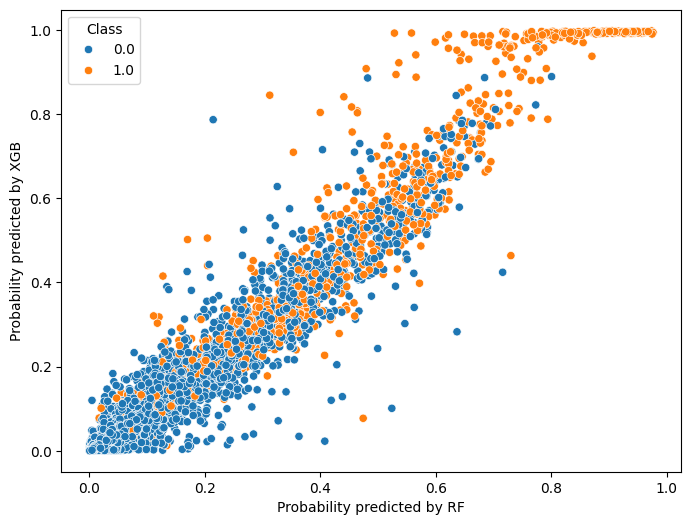

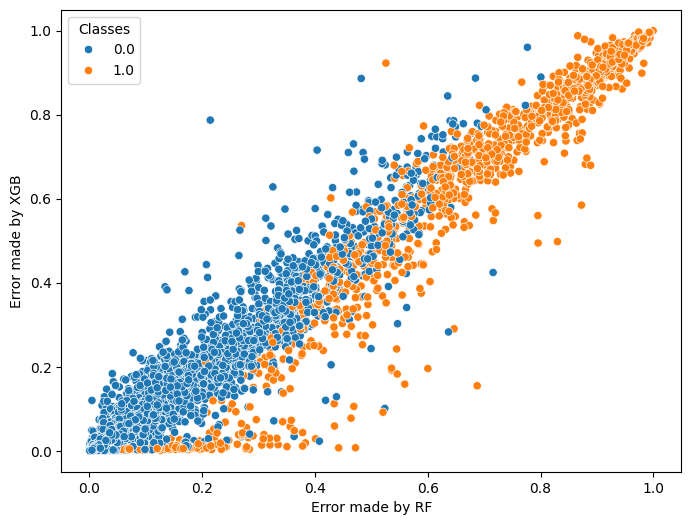

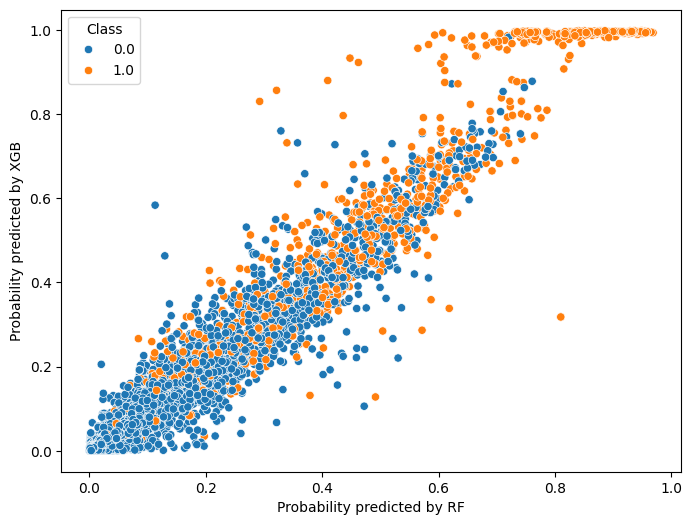

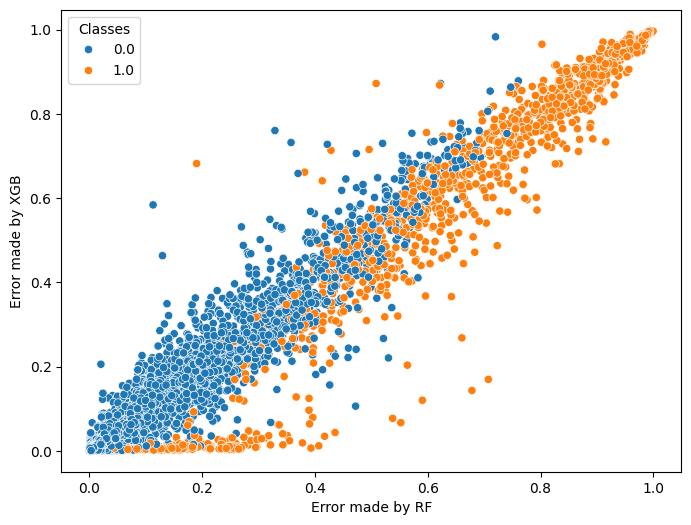

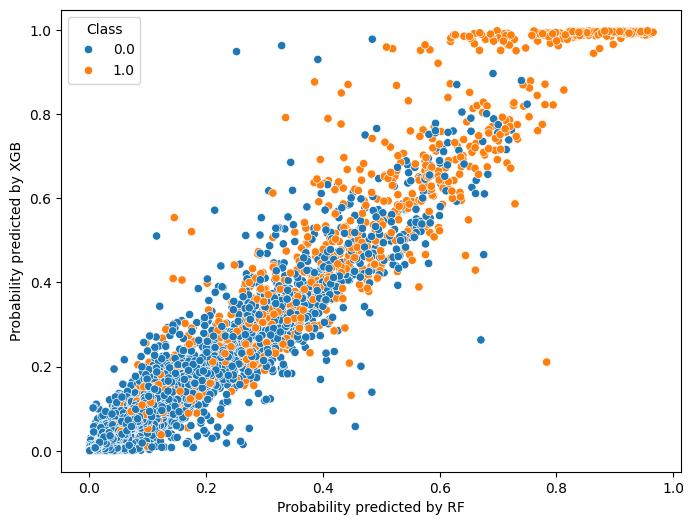

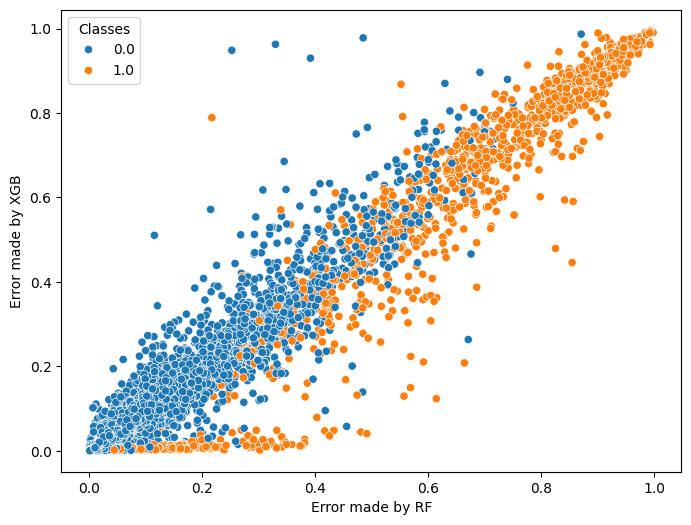

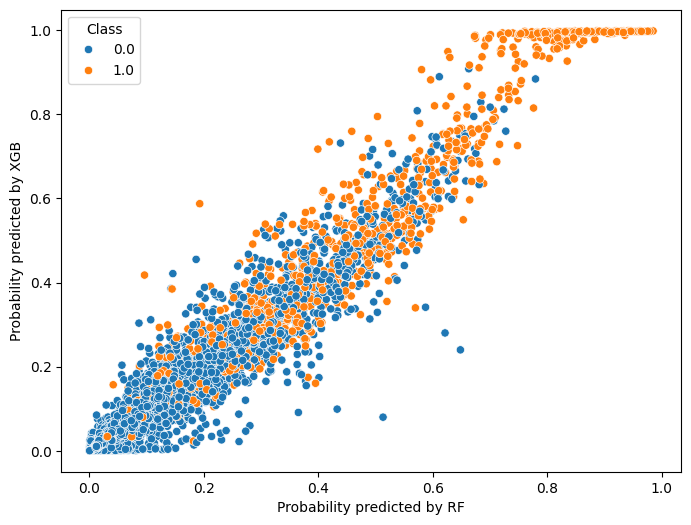

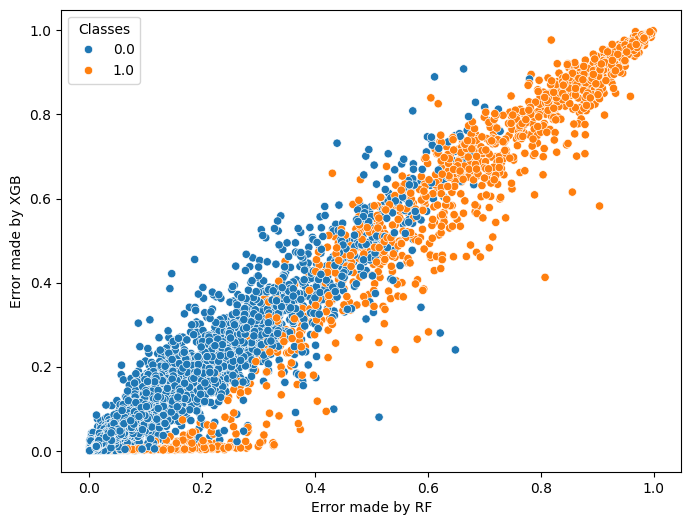

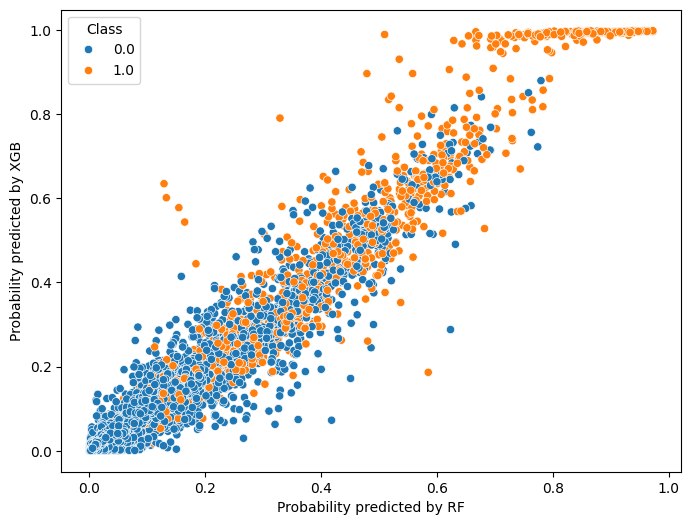

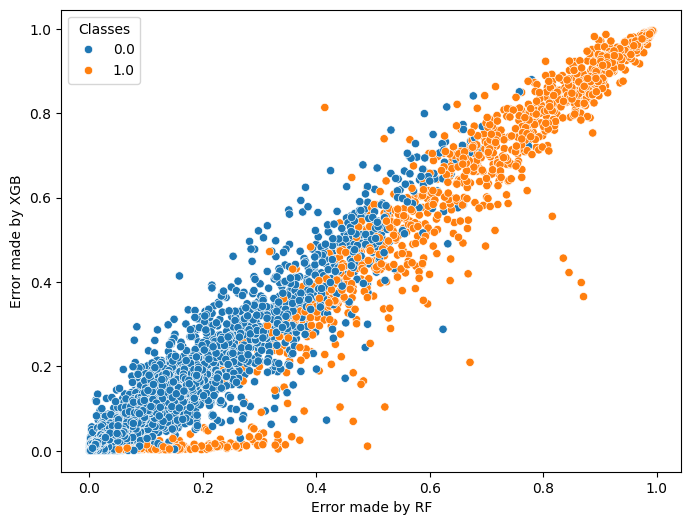

Mean AUC score RF: 0.8949584794603453
Standard Deviation AUC score RF: 0.006351090391285792
Mean AUC score XGB: 0.8981629989549982
Standard Deviation AUC score XGB: 0.005701188506164682
Mean AUC score best predictions: 0.9158926526985249
Standard Deviation AUC score best predictions: 0.005542498165478061


In [ ]:
# Analysis of the difference in predictions: here we analyze how the two classifiers differ in their predictions
# to understand if, by combining them, we can improve the overall performance

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)


cv = StratifiedKFold(n_splits=5, shuffle=True)
auc_scores_rf = []
auc_scores_xgb = []
auc_scores_best = []

for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

    # Save predictions and plot them
    predictions = pd.DataFrame({'RF':y_pred_proba_rf, 'XGB':y_pred_proba_xgb, 'Classes': y_test})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=predictions, x='RF', y='XGB', hue='Classes')
    plt.xlabel('Probability predicted by RF')
    plt.ylabel('Probability predicted by XGB')
    plt.legend(title='Class')
    plt.show()

    # Save for each instance the best prediction
    error_rf = abs(y_pred_proba_rf-y_test)
    error_xgb = abs(y_pred_proba_xgb-y_test)

    errors = pd.DataFrame({'RF':error_rf, 'XGB':error_xgb, 'Classes': y_test})
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=errors, x='RF', y='XGB', hue='Classes')
    plt.xlabel('Error made by RF')
    plt.ylabel('Error made by XGB')
    plt.show()

    best_pred_proba = []

    for j,index in enumerate(y_test.index):
      if error_rf.loc[index] <= error_xgb.loc[index]:
        best_pred_proba.append(y_pred_proba_rf[j])
      else:
        best_pred_proba.append(y_pred_proba_xgb[j])

    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    best_auc = roc_auc_score(y_test,best_pred_proba)


    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)
    auc_scores_best.append(best_auc)

# Calculate mean AUC score across folds
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))
print("Mean AUC score best predictions:", np.mean(auc_scores_best))
print("Standard Deviation AUC score best predictions:", np.std(auc_scores_best))

In [ ]:
# Analysis of the difference in predictions: here we collect for each test instance the two predictions to understand
# whether the two classifiers systematically perform better on certain instances.

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)


cv = StratifiedKFold(n_splits=5, shuffle=True)

auc_scores_rf = []
auc_scores_xgb = []

tests = pd.DataFrame(columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
           'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
           'NumberNonRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
           'NumberOfDependents', "RF", "XGB", "Best","True"])


for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]


    # Save for each instance the best prediction
    error_rf = abs(y_pred_proba_rf-y_test)
    error_xgb = abs(y_pred_proba_xgb-y_test)
    X_test["RF"] = y_pred_proba_rf
    X_test["XGB"] = y_pred_proba_xgb
    X_test["Best"] = np.argmin(np.vstack((error_rf, error_xgb)), axis=0)
    X_test["True"] = y_test
    tests = pd.concat([tests, X_test], axis=0)


    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)


# Calculate mean AUC score across folds
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))

Mean AUC score RF: 0.8953898240478884
Standard Deviation AUC score RF: 0.0041431624586807285
Mean AUC score XGB: 0.8982019477938762
Standard Deviation AUC score XGB: 0.0041112065137529396


In [ ]:
tests["Best"] = tests["Best"].astype(int)
tests.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RF,XGB,Best,True
count,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,6.264249,52.468573,0.421346,353.836220,5.134821e+03,7.444751,0.266767,1.018222,0.240678,0.744642,0.066549,0.066728,0.710522,0.066845
std,259.630969,14.798620,4.196468,2153.230263,1.289894e+04,4.770808,4.173056,1.133213,4.158773,1.103631,0.128181,0.143351,0.453522,0.249755
min,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000063,0.000000,0.000000
25%,0.029677,41.000000,0.000000,0.175078,1.711122e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.009729,0.007060,0.000000,0.000000
50%,0.153515,52.000000,0.000000,0.366291,4.184856e+03,7.000000,0.000000,1.000000,0.000000,0.000000,0.019019,0.016907,1.000000,0.000000
75%,0.558293,63.000000,0.000000,0.857619,7.022994e+03,10.000000,0.000000,2.000000,0.000000,1.000000,0.064794,0.057020,1.000000,0.000000
max,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,57.000000,98.000000,54.000000,98.000000,20.000000,0.985146,0.998740,1.000000,1.000000


In [ ]:
tests[tests["Best"]==0].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RF,XGB,Best,True
count,32566.000000,32566.000000,32566.000000,32566.000000,3.256600e+04,32566.000000,32566.000000,32566.000000,32566.000000,32566.000000,32566.000000,32566.000000,32566.0,32566.000000
mean,6.689022,50.310446,0.580206,234.389704,5.183410e+03,8.228858,0.392864,1.011269,0.364982,0.864042,0.079777,0.089558,0.0,0.094669
std,231.873730,14.975867,5.328825,3032.619464,1.011869e+04,5.384567,5.303588,1.319670,5.292291,1.189464,0.120762,0.131207,0.0,0.292762
min,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000127,0.0,0.000000
25%,0.059589,39.000000,0.000000,0.147874,2.399524e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.013222,0.015506,0.0,0.000000
50%,0.230089,50.000000,0.000000,0.372511,4.111532e+03,7.000000,0.000000,1.000000,0.000000,0.000000,0.028447,0.034153,0.0,0.000000
75%,0.629240,61.000000,0.000000,0.701369,6.373492e+03,11.000000,0.000000,2.000000,0.000000,2.000000,0.092340,0.104153,0.0,0.000000
max,22000.000000,102.000000,98.000000,326442.000000,1.018456e+06,57.000000,98.000000,25.000000,98.000000,20.000000,0.870025,0.988825,0.0,1.000000


In [ ]:
tests[tests["Best"]==1].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberNonRealEstateLoansOrLines,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RF,XGB,Best,True
count,79933.000000,79933.000000,79933.000000,79933.000000,7.993300e+04,79933.000000,79933.000000,79933.000000,79933.000000,79933.000000,79933.000000,79933.000000,79933.0,79933.000000
mean,6.091189,53.347829,0.356624,402.500667,5.115026e+03,7.125292,0.215393,1.021055,0.190034,0.695996,0.061160,0.057427,1.0,0.055509
std,270.124383,14.634929,3.633424,1664.433359,1.387283e+04,4.457465,3.611186,1.047773,3.594746,1.062852,0.130700,0.147001,0.0,0.228972
min,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000117,0.000063,1.0,0.000000
25%,0.023789,43.000000,0.000000,0.184625,9.557544e+02,4.000000,0.000000,0.000000,0.000000,0.000000,0.008566,0.005098,1.0,0.000000
50%,0.124576,53.000000,0.000000,0.364127,4.228444e+03,6.000000,0.000000,1.000000,0.000000,0.000000,0.016238,0.012330,1.0,0.000000
75%,0.539294,64.000000,0.000000,1.238231,7.242383e+03,9.000000,0.000000,2.000000,0.000000,1.000000,0.055985,0.042269,1.0,0.000000
max,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,56.000000,98.000000,54.000000,98.000000,10.000000,0.985146,0.998740,1.0,1.000000


## Meta Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberNonRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [12]:
# Meta Model: here we first get for each fold the predictions of both classifiers and then train a
#logistic regression to learn how to combine the two predictions

# We use the two classifiers with their best settings
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt")

xgb_classifier = XGBClassifier(booster="gbtree", n_estimators=300, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=0.6, reg_lambda=1)

meta = LogisticRegression(solver="lbfgs",max_iter=3000,class_weight="balanced")

cv = StratifiedKFold(n_splits=5, shuffle=True)
cv2 = StratifiedKFold(n_splits=3, shuffle=True)
auc_scores_rf = []
auc_scores_xgb = []
auc_scores_meta = []

for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    # Train and get predictions with Random Forest
    rf_classifier.fit(X_train, y_train)
    y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]

    # Train and get predictions with XGBoost
    xgb_classifier.fit(X_train, y_train)
    y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

    # Train the meta model
    meta_data = pd.DataFrame({"True":y_test,"RF":y_pred_proba_rf,"XGB":y_pred_proba_xgb})
    meta_data.reset_index(inplace=True)
    X_meta = meta_data.drop(columns="True")
    y_meta = meta_data["True"]
    auc_meta_fold = []
    for train_idx2, test_idx2 in cv2.split(X_meta, y_meta):
      X_train_meta, y_train_meta = X_meta.loc[train_idx2], y_meta.loc[train_idx2]
      X_test_meta, y_test_meta = X_meta.loc[test_idx2], y_meta.loc[test_idx2]

      meta.fit(X_train_meta,y_train_meta)
      y_pred_proba_meta = meta.predict_proba(X_test_meta)[:, 1]

      auc_meta = roc_auc_score(y_test_meta, y_pred_proba_meta)
      auc_meta_fold.append(auc_meta)


    # AUC scores for the current fold
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

    auc_scores_rf.append(auc_rf)
    auc_scores_xgb.append(auc_xgb)
    auc_scores_meta.append(np.mean(auc_meta_fold))

# Calculate mean AUC score across folds
print("AUC scores RF:", auc_scores_rf)
print("Mean AUC score RF:", np.mean(auc_scores_rf))
print("Standard Deviation AUC score RF:", np.std(auc_scores_rf))

print("AUC scores XGB:", auc_scores_xgb)
print("Mean AUC score XGB:", np.mean(auc_scores_xgb))
print("Standard Deviation AUC score XGB:", np.std(auc_scores_xgb))

print("AUC scores Meta Model1:", auc_scores_meta)
print("Mean AUC score Meta Model1:", np.mean(auc_scores_meta))
print("Standard Deviation AUC score Meta Model1:", np.std(auc_scores_meta))


AUC scores RF: [0.8974342852285948, 0.887241408444567, 0.8968104486974217, 0.8941215341676024, 0.9014407400698241]
Mean AUC score RF: 0.8954096833216021
Standard Deviation AUC score RF: 0.004707756253884019
AUC scores XGB: [0.8995870825699323, 0.8909752281842945, 0.8999769427966017, 0.8968671812614762, 0.904832964282276]
Mean AUC score XGB: 0.8984478798189162
Standard Deviation AUC score XGB: 0.004533083949890985
AUC scores Meta Model1: [0.8912013339240757, 0.8839864119766064, 0.8917483037894937, 0.8847145708645368, 0.892554544985249]
Mean AUC score Meta Model1: 0.8888410331079923
Standard Deviation AUC score Meta Model1: 0.0036988768618706537


In [ ]:
base_models1 = [XGBClassifier(booster="gbtree", n_estimators=200, eta=0.05, max_depth=6, min_child_weight=15,
                               colsample_bynode=1, reg_lambda=1) for _ in range(3)]

base_models2 = [RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10, min_samples_split=2,
                                       max_features="sqrt") for _ in range(3)]

base_models = base_models1 + base_models2

meta = LogisticRegression(solver="lbfgs",max_iter=3000,class_weight="balanced")

cv = StratifiedKFold(n_splits=5, shuffle=True)
cv2 = StratifiedKFold(n_splits=3, shuffle=True)
auc_scores_base = []
auc_scores_meta = []

for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test, y_test = X.loc[test_idx], y[test_idx]

    pred_proba = []
    auc_scores = []

    for base_classifier in base_models:
      subset = np.random.choice([0,1,2,3,4,5,6,7,8,9],size=6,replace=False)
      base_classifier.fit(X_train.iloc[:,subset], y_train)
      y_pred_proba_base = base_classifier.predict_proba(X_test.iloc[:,subset])[:, 1]
      pred_proba.append(y_pred_proba_base)
      auc = roc_auc_score(y_test, y_pred_proba_base)
      auc_scores.append(auc)

    auc_scores_base.append(np.mean(auc_scores))

    # Train the meta model
    data_meta = pd.DataFrame({i:pred for i,pred in enumerate(pred_proba)})
    data_meta["True"] = y_test.values
    X_meta = data_meta.drop(columns="True")
    y_meta = data_meta["True"]
    auc_meta_fold = []
    for train_idx2, test_idx2 in cv2.split(X_meta, y_meta):
      X_train_meta, y_train_meta = X_meta.loc[train_idx2], y_meta.loc[train_idx2]
      X_test_meta, y_test_meta = X_meta.loc[test_idx2], y_meta.loc[test_idx2]

      meta.fit(X_train_meta,y_train_meta)
      y_pred_proba_meta = meta.predict_proba(X_test_meta)[:, 1]

      auc_meta = roc_auc_score(y_test_meta, y_pred_proba_meta)
      auc_meta_fold.append(auc_meta)


    # AUC scores for the current fold
    auc_scores_meta.append(np.mean(auc_meta_fold))

# Calculate mean AUC score across folds
print("AUC scores base:", auc_scores_base)
print("Mean AUC score base:", np.mean(auc_scores_base))
print("Standard Deviation AUC score base:", np.std(auc_scores_base))

print("AUC scores Meta Model1:", auc_scores_meta)
print("Mean AUC score Meta Model1:", np.mean(auc_scores_meta))
print("Standard Deviation AUC score Meta Model1:", np.std(auc_scores_meta))


AUC scores base: [0.8498593962384257, 0.8400197587027721, 0.8517356322261316, 0.8667106118406208, 0.8401770584730576]
Mean AUC score base: 0.8497004914962016
Standard Deviation AUC score base: 0.009776743901764398
AUC scores Meta Model1: [0.8949082786796153, 0.8936786167229033, 0.8929584818430802, 0.8944400784390095, 0.8879460374902685]
Mean AUC score Meta Model1: 0.8927862986349753
Standard Deviation AUC score Meta Model1: 0.0025096531045639523


## Neural Network

In [ ]:
import torch
import torch.nn as nn

In [ ]:
def replace_values_log(original,threshold):
    if original > threshold:
        return  np.log(np.exp(threshold) + original - threshold)
    else:
        return original

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train['RevolvingUtilizationOfUnsecuredLines'] = X_train['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
X_train["DebtRatio"] = X_train["DebtRatio"].apply(replace_values_log,args=(2,))
X_train["MonthlyIncome"] = np.log(X_train["MonthlyIncome"]+1)
X_test['RevolvingUtilizationOfUnsecuredLines'] = X_test['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
X_test["DebtRatio"] = X_test["DebtRatio"].apply(replace_values_log,args=(2,))
X_test["MonthlyIncome"] = np.log(X_test["MonthlyIncome"]+1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns,index=X_test.index)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).unsqueeze(1)

In [ ]:
class BinaryMLP(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob=0.3):
        super(BinaryMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_prob)
        self.fc4 = nn.Linear(hidden_size, 1)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout3(out)
        out = self.fc4(out)
        out = torch.sigmoid(out)
        return out

In [ ]:
# Define the number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)


# Initialize lists to store evaluation metrics for each fold
auc_scores = []
test_losses = []


# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]

    X_train_fold['RevolvingUtilizationOfUnsecuredLines'] = X_train_fold['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
    X_train_fold["DebtRatio"] = X_train_fold["DebtRatio"].apply(replace_values_log,args=(2,))
    X_train_fold["MonthlyIncome"] = np.log(X_train_fold["MonthlyIncome"]+1)
    X_test_fold['RevolvingUtilizationOfUnsecuredLines'] = X_test_fold['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_log,args=(2,))
    X_test_fold["DebtRatio"] = X_test_fold["DebtRatio"].apply(replace_values_log,args=(2,))
    X_test_fold["MonthlyIncome"] = np.log(X_test_fold["MonthlyIncome"]+1)

    X_train_tensor = torch.tensor(X_train_fold.values, dtype=torch.float)
    y_train_tensor = torch.tensor(y_train_fold.values, dtype=torch.float).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test_fold.values, dtype=torch.float)
    y_test_tensor = torch.tensor(y_test_fold.values, dtype=torch.float).unsqueeze(1)

    input_size = X_train_fold.shape[1]
    hidden_size = 64
    dropout_prob = 0.3
    learning_rate = 0.001

    model = BinaryMLP(input_size, hidden_size,dropout_prob)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=learning_rate,
        betas=(0.9, 0.999),  # Default values for the exponential decay rates for the moment estimates
        eps=1e-8,  # Default value for term added to the denominator to improve numerical stability
        weight_decay=0,  # Default value for L2 penalty (regularization term)
        amsgrad=False  # Default value for whether to use the AMSGrad variant of this algorithm
    )

    for epoch in range(1000):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 50 == 0:
            print(f'Fold {fold+1}, Epoch [{epoch+1}/{1000}], Loss: {loss:.4f}')


    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted = torch.round(outputs).numpy()
        y_test_np = y_test_tensor.numpy().astype(int)

        # Calculate AUC score
        loss = criterion(outputs, y_test_tensor)
        auc_score = roc_auc_score(y_test_np, outputs.numpy())
        print(f"AUC Score: {auc_score:.4f}")
        print(f"Test Loss: {loss:.4f}")

    auc_scores.append(auc_score)
    test_losses.append(loss)


# Aggregate evaluation metrics across all folds
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
mean_test_loss = np.mean(test_losses)
std_test_loss = np.std(test_losses)

print(f"Mean AUC Score: {mean_auc:.4f}")
print(f"SD AUC Score: {std_auc:.4f}")

print(f"Mean Test Loss: {mean_test_loss:.4f}")
print(f"Mean Test Loss: {std_test_loss:.4f}")


Fold 1, Epoch [50/1000], Loss: 0.2584
Fold 1, Epoch [100/1000], Loss: 0.2414


KeyboardInterrupt: 